In [1]:
import os
import pandas as pd
from pmdarima.arima import auto_arima
from math import sqrt
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

In [2]:
os.chdir(r"D:\March 2024\PML\Datasets")

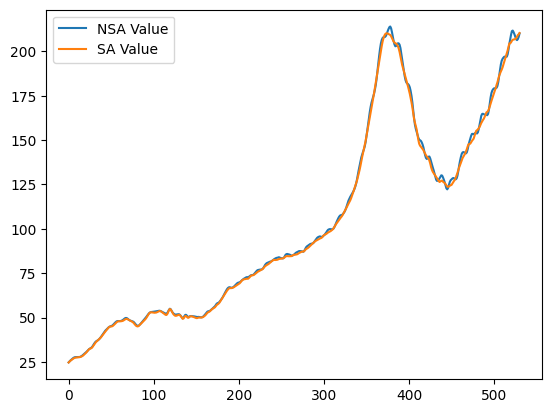

In [3]:
fmac = pd.read_csv('FMAC-HPI_24420.csv')
fmac.plot()
plt.show()

Arima - For NSA Value

In [6]:
y = fmac['NSA Value']
y_train = y[:-12]
y_test = y[-12:]

In [7]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-258.744, Time=1.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1625.721, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=545.901, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1668.139, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-211.845, Time=0.64 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=1.03 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=3.58 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-254.857, Time=1.77 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] intercept
Total fit time: 15.390 seco

In [8]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

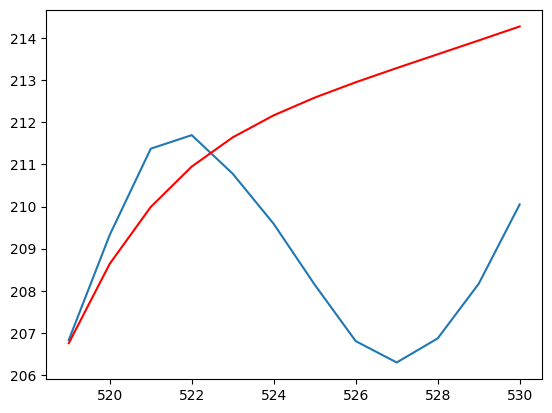

In [9]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

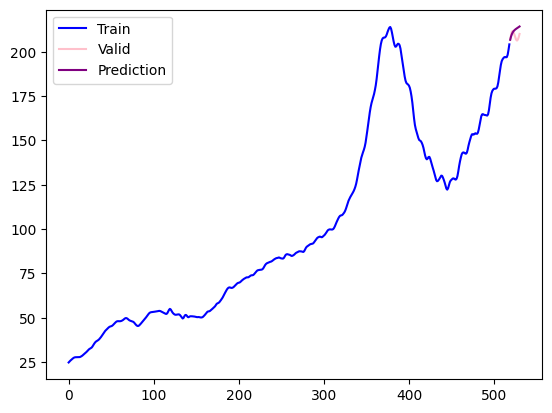

In [10]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [11]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4.214


Sarima - For NSA Value

In [12]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-334.128, Time=5.10 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1625.721, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=301.267, Time=1.81 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.88 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1668.139, Time=0.04 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-306.183, Time=3.51 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-321.800, Time=10.32 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-335.084, Time=10.48 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=7.91 sec
 ARIMA(2,1,2)(2,0,2)[12] intercept   : AIC=-329.741, Time=10.44 sec
 ARIMA(1,1,2)(1,0,2)[12] intercept   : AIC=-338.481, Time=6.87 sec
 ARIMA(1,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=6.80 sec
 ARIMA(1,1,2)(1,0,1)[12] intercept   : AIC=-337.919, Time=4.29 sec
 ARIMA(1,1,2)(2,0,2)[12] intercept   

In [13]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

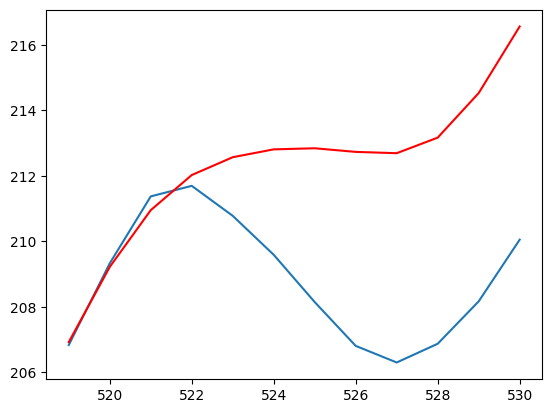

In [14]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

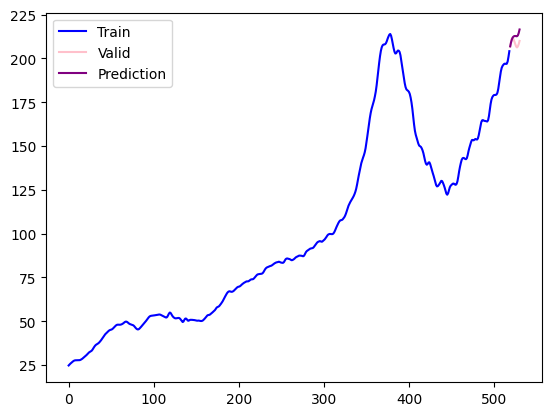

In [15]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [16]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 4.418


Arima - For SA Value

In [17]:
y = fmac['SA Value']
y_train = y[:-12]
y_test = y[-12:]

In [18]:
model = auto_arima(y_train, trace=True,
                   error_action='ignore', 
                   suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-49.246, Time=0.99 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1450.737, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=25.346, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=897.481, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1510.192, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-38.939, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-25.052, Time=1.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-61.884, Time=1.96 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-48.707, Time=3.17 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=-70.735, Time=1.44 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=-71.735, Time=1.19 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=-71.404, Time=0.75 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=-69.986, Time=1.65 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=-32.614, Time=0.52 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=-71.

In [19]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

forecast

,Prediction
519,206.254596
520,207.885781
521,209.485682
522,211.076023
523,212.672314
524,214.231033
525,215.742052
526,217.202782
527,218.628137
528,220.023757


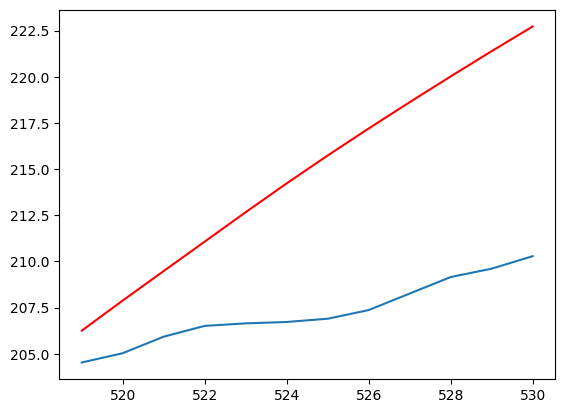

In [20]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

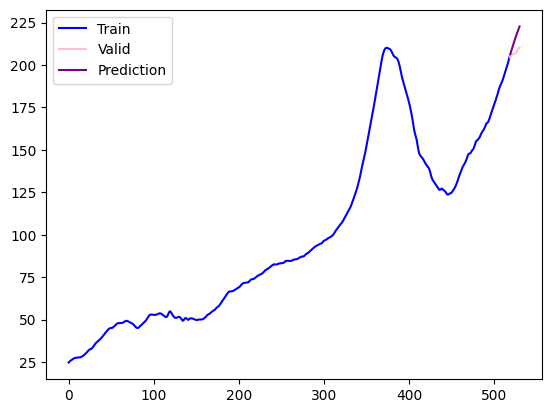

In [21]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [22]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 8.323


Sarima - For SA Value

In [23]:
model = auto_arima(y_train, trace=True, 
                   error_action='ignore', 
                   suppress_warnings=True,
                   seasonal=True,m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=-100.716, Time=3.98 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1450.737, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=25.778, Time=0.87 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=660.930, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1510.192, Time=0.03 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=-75.690, Time=2.81 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=-94.572, Time=3.51 sec
 ARIMA(2,1,2)(2,0,1)[12] intercept   : AIC=-100.011, Time=9.55 sec
 ARIMA(2,1,2)(1,0,2)[12] intercept   : AIC=-99.425, Time=7.08 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=-49.246, Time=1.41 sec
 ARIMA(2,1,2)(0,0,2)[12] intercept   : AIC=inf, Time=9.57 sec
 ARIMA(2,1,2)(2,0,0)[12] intercept   : AIC=-101.926, Time=9.05 sec
 ARIMA(1,1,2)(2,0,0)[12] intercept   : AIC=-100.157, Time=4.65 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=-80.892, Time=3.62 sec
 ARIMA(3,1,2)(2,0,0)[12] interce

In [24]:
forecast = model.predict(n_periods=len(y_test))
forecast = pd.DataFrame(forecast,index = y_test.index,
                        columns=['Prediction'])

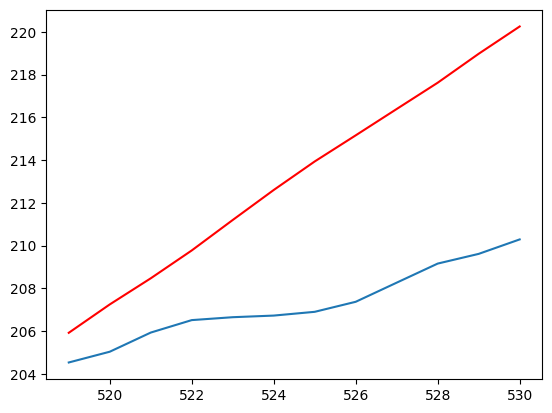

In [25]:
# plot results
plt.plot(y_test)
plt.plot(forecast, color='red')
plt.show()

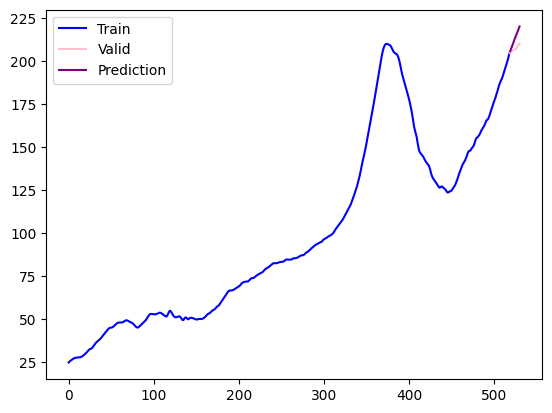

In [26]:
#plot the predictions for validation set
plt.plot(y_train, label='Train',color="blue")
plt.plot(y_test, label='Valid',color="pink")
plt.plot(forecast, label='Prediction',color="purple")
plt.legend(loc='best')
plt.show()

In [27]:
rms = sqrt(mean_squared_error(y_test, forecast))
print('Test RMSE: %.3f' % rms)

Test RMSE: 6.543
